In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_DiabloImmortal_1.csv")
df.head()

,userName,score,at,content
0,Muhamat imron (Atengg93),5,2024-05-26 16:09:40,bukan kaleng kaleng
1,Rothi Bakar,5,2024-05-26 12:13:06,Game bagus mohon tabah karakter menggunakan gr...
2,Siau Chie,5,2024-05-26 06:48:45,good
3,Jojo Ernanda,5,2024-05-26 05:33:30,game ny bagus buat yg hobby game pertualangan....
4,Mujahidin Satria Wijaya,5,2024-05-24 22:44:19,Tolong beri bahasa Indonesia plis


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,bukan kaleng kaleng,Muhamat imron (Atengg93),2024-05-26 16:09:40
1,Game bagus mohon tabah karakter menggunakan gr...,Rothi Bakar,2024-05-26 12:13:06
2,good,Siau Chie,2024-05-26 06:48:45
3,game ny bagus buat yg hobby game pertualangan....,Jojo Ernanda,2024-05-26 05:33:30
4,Tolong beri bahasa Indonesia plis,Mujahidin Satria Wijaya,2024-05-24 22:44:19
...,...,...,...
791,whatever,Eky Rizky,2023-10-08 01:55:10
792,"KENAPA GAK BISA LOGIN? TULISAN MUTER2 ""CONNECT...",Yosua Ega,2023-10-07 15:37:52
793,bagus banget gambar dan gameplay nya mirip mae...,Yosua Suryadi,2023-10-07 15:06:48
794,Menakjubkan,Zero Seven Gea Hevit,2023-10-07 00:00:35


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   796 non-null    object
 1   userName  796 non-null    object
 2   at        796 non-null    object
dtypes: object(3)
memory usage: 18.8+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,796,796,796
unique,589,796,796
top,good,Muhamat imron (Atengg93),2024-05-26 16:09:40
freq,39,1,1


# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(796, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(589, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,bukan kaleng kaleng,Muhamat imron (Atengg93),2024-05-26 16:09:40
1,game bagus mohon tabah karakter menggunakan gr...,Rothi Bakar,2024-05-26 12:13:06
2,good,Siau Chie,2024-05-26 06:48:45
3,game ny bagus buat yg hobby game pertualangang...,Jojo Ernanda,2024-05-26 05:33:30
4,tolong beri bahasa indonesia plis,Mujahidin Satria Wijaya,2024-05-24 22:44:19
...,...,...,...
791,whatever,Eky Rizky,2023-10-08 01:55:10
792,kenapa gak bisa login tulisan muter connecting...,Yosua Ega,2023-10-07 15:37:52
793,bagus banget gambar dan gameplay nya mirip mae...,Yosua Suryadi,2023-10-07 15:06:48
794,menakjubkan,Zero Seven Gea Hevit,2023-10-07 00:00:35


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,bukan kaleng kaleng,Muhamat imron (Atengg93),2024-05-26 16:09:40
1,game bagus mohon tabah karakter menggunakan gr...,Rothi Bakar,2024-05-26 12:13:06
2,good,Siau Chie,2024-05-26 06:48:45
3,game ny bagus buat yang hobby game pertualanga...,Jojo Ernanda,2024-05-26 05:33:30
4,tolong beri bahasa indonesia plis,Mujahidin Satria Wijaya,2024-05-24 22:44:19
...,...,...,...
791,whatever,Eky Rizky,2023-10-08 01:55:10
792,kenapa tidak bisa login tulisan muter connecti...,Yosua Ega,2023-10-07 15:37:52
793,bagus banget gambar dan gameplay nya mirip mae...,Yosua Suryadi,2023-10-07 15:06:48
794,menakjubkan,Zero Seven Gea Hevit,2023-10-07 00:00:35


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,bukan kaleng kaleng,Muhamat imron (Atengg93),2024-05-26 16:09:40
1,game bagus mohon tabah karakter menggunakan gr...,Rothi Bakar,2024-05-26 12:13:06
2,good,Siau Chie,2024-05-26 06:48:45
3,game ny bagus buat hobby game pertualangangk r...,Jojo Ernanda,2024-05-26 05:33:30
4,beri bahasa indonesia plis,Mujahidin Satria Wijaya,2024-05-24 22:44:19
...,...,...,...
791,whatever,Eky Rizky,2023-10-08 01:55:10
792,tidak login tulisan muter connecting to battle...,Yosua Ega,2023-10-07 15:37:52
793,bagus banget gambar gameplay nya mirip maen pc,Yosua Suryadi,2023-10-07 15:06:48
794,menakjubkan,Zero Seven Gea Hevit,2023-10-07 00:00:35


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                [bukan, kaleng, kaleng]
1      [game, bagus, mohon, tabah, karakter, mengguna...
2                                                 [good]
3      [game, ny, bagus, buat, hobby, game, pertualan...
4                        [beri, bahasa, indonesia, plis]
                             ...                        
791                                           [whatever]
792    [tidak, login, tulisan, muter, connecting, to,...
793    [bagus, banget, gambar, gameplay, nya, mirip, ...
794                                        [menakjubkan]
795                              [bintang, segini, dulu]
Name: content, Length: 589, dtype: object

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_DiabloImmortal_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_DiabloImmortal_1.csv', encoding = 'latin1')
df_clean

,content
0,bukan kaleng kaleng
1,game bagus mohon tabah karakter guna greatsword
2,good
3,game ny bagus buat hobby game pertualangangk r...
4,beri bahasa indonesia plis
...,...
584,whatever
585,tidak login tulis muter connecting to battle w...
586,bagus banget gambar gameplay nya mirip maen pc
587,takjub


# **Translate**

In [22]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_DiabloImmortal_1.csv', encoding='latin1')

In [25]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 5.37MB/s]                   


In [27]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,bukan kaleng kaleng
1,game bagus mohon tabah karakter guna greatsword
2,good
3,game ny bagus buat hobby game pertualangangk r...
4,beri bahasa indonesia plis
...,...
584,whatever
585,tidak login tulis muter connecting to battle w...
586,bagus banget gambar gameplay nya mirip maen pc
587,takjub


In [28]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_DiabloImmortal_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_DiabloImmortal_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bukan kaleng kaleng,Not a tin can.
1,1,game bagus mohon tabah karakter guna greatsword,Nice game. Please bear character for the great...
2,2,good,good
3,3,game ny bagus buat hobby game pertualangangk r...,It's a good game for the hobby. The adventurer...
4,4,beri bahasa indonesia plis,speak English please
...,...,...,...
584,584,whatever,♪ Whatever ♪
585,585,tidak login tulis muter connecting to battle w...,no login write muter connecting to battle work...
586,586,bagus banget gambar gameplay nya mirip maen pc,It's really good. It's a game play. It's like ...
587,587,takjub,I'm amazed.


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_DiabloImmortal_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bukan kaleng kaleng,Not a tin can.
1,1,game bagus mohon tabah karakter guna greatsword,Nice game. Please bear character for the great...
2,2,good,good
3,3,game ny bagus buat hobby game pertualangangk r...,It's a good game for the hobby. The adventurer...
4,4,beri bahasa indonesia plis,speak English please
...,...,...,...
584,584,whatever,♪ Whatever ♪
585,585,tidak login tulis muter connecting to battle w...,no login write muter connecting to battle work...
586,586,bagus banget gambar gameplay nya mirip maen pc,It's really good. It's a game play. It's like ...
587,587,takjub,I'm amazed.


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 315
Netral = 173
Negatif = 101

Total Data Seluruhnya : 589


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,bukan kaleng kaleng,Not a tin can.,Netral
1,1,game bagus mohon tabah karakter guna greatsword,Nice game. Please bear character for the great...,Positif
2,2,good,good,Positif
3,3,game ny bagus buat hobby game pertualangangk r...,It's a good game for the hobby. The adventurer...,Positif
4,4,beri bahasa indonesia plis,speak English please,Netral
...,...,...,...,...
584,584,whatever,♪ Whatever ♪,Netral
585,585,tidak login tulis muter connecting to battle w...,no login write muter connecting to battle work...,Netral
586,586,bagus banget gambar gameplay nya mirip maen pc,It's really good. It's a game play. It's like ...,Positif
587,587,takjub,I'm amazed.,Netral


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,bukan kaleng kaleng,Not a tin can.,Netral
1,game bagus mohon tabah karakter guna greatsword,Nice game. Please bear character for the great...,Positif
2,good,good,Positif
3,game ny bagus buat hobby game pertualangangk r...,It's a good game for the hobby. The adventurer...,Positif
4,beri bahasa indonesia plis,speak English please,Netral
...,...,...,...
584,whatever,♪ Whatever ♪,Netral
585,tidak login tulis muter connecting to battle w...,no login write muter connecting to battle work...,Netral
586,bagus banget gambar gameplay nya mirip maen pc,It's really good. It's a game play. It's like ...,Positif
587,takjub,I'm amazed.,Netral


# **Visualisasi**


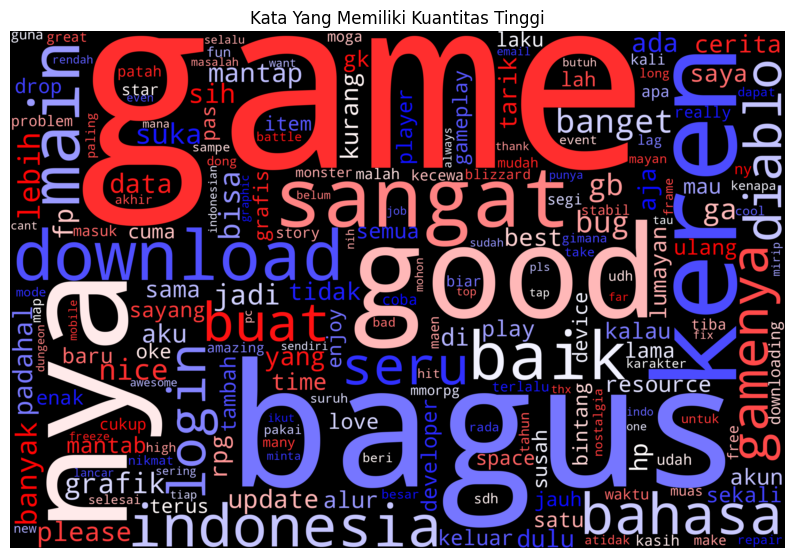

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


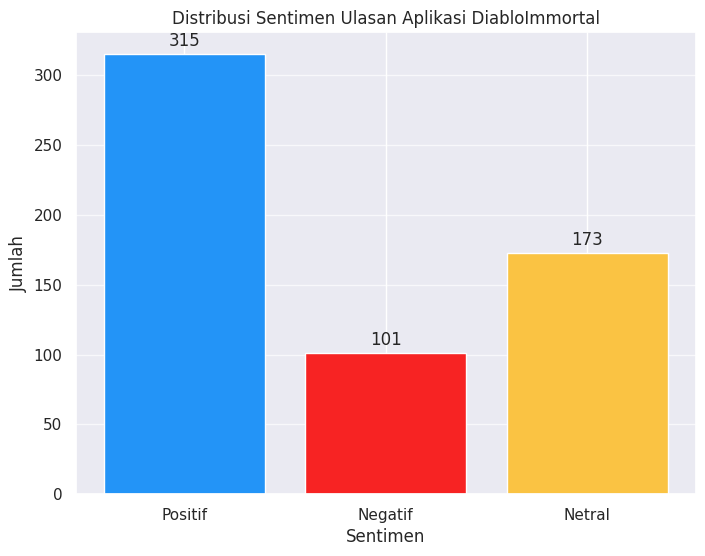

In [37]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DiabloImmortal")


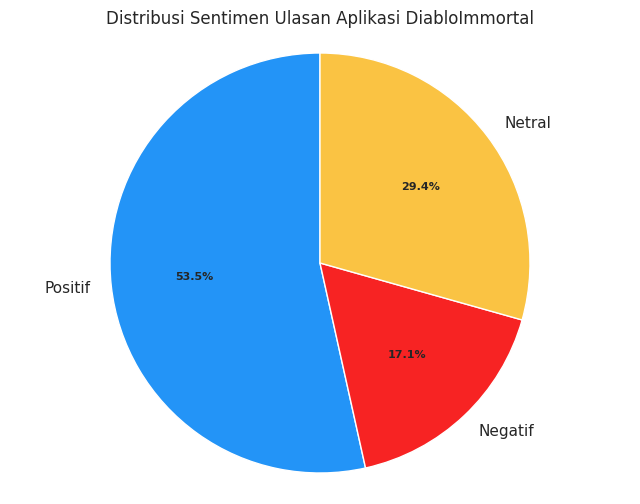

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DiabloImmortal")

In [39]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,game bagus mohon tabah karakter guna greatsword,Nice game. Please bear character for the great...,Positif
2,good,good,Positif
3,game ny bagus buat hobby game pertualangangk r...,It's a good game for the hobby. The adventurer...,Positif
6,oke lah,Okay.,Positif
7,good game,good game,Positif
...,...,...,...
578,its game so good very nice,its game so good very nice,Positif
581,this good game,this good game,Positif
582,bagus game nya,Nice game.,Positif
586,bagus banget gambar gameplay nya mirip maen pc,It's really good. It's a game play. It's like ...,Positif


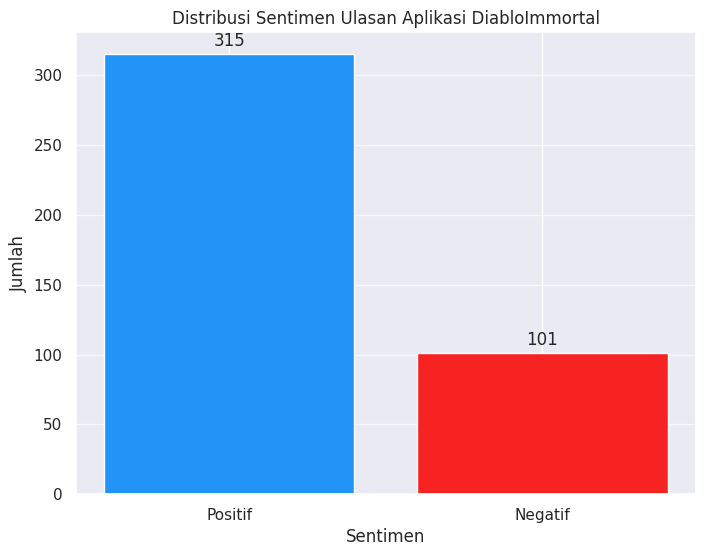

In [40]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DiabloImmortal")


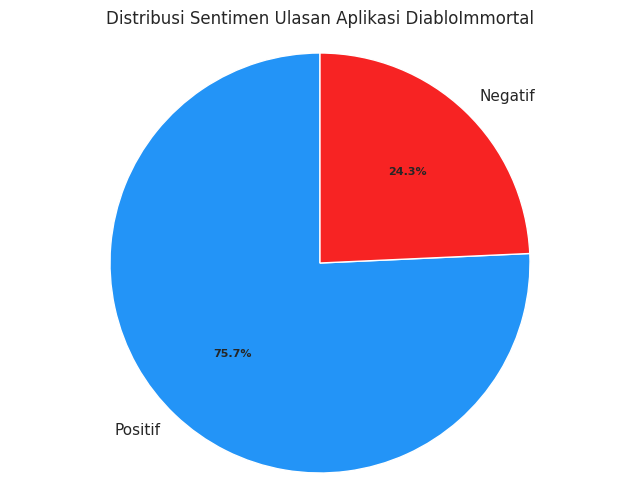

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DiabloImmortal")

In [42]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,game bagus mohon tabah karakter guna greatsword,Nice game. Please bear character for the great...,1
2,good,good,1
3,game ny bagus buat hobby game pertualangangk r...,It's a good game for the hobby. The adventurer...,1
6,oke lah,Okay.,1
7,good game,good game,1
...,...,...,...
578,its game so good very nice,its game so good very nice,1
581,this good game,this good game,1
582,bagus game nya,Nice game.,1
586,bagus banget gambar gameplay nya mirip maen pc,It's really good. It's a game play. It's like ...,1


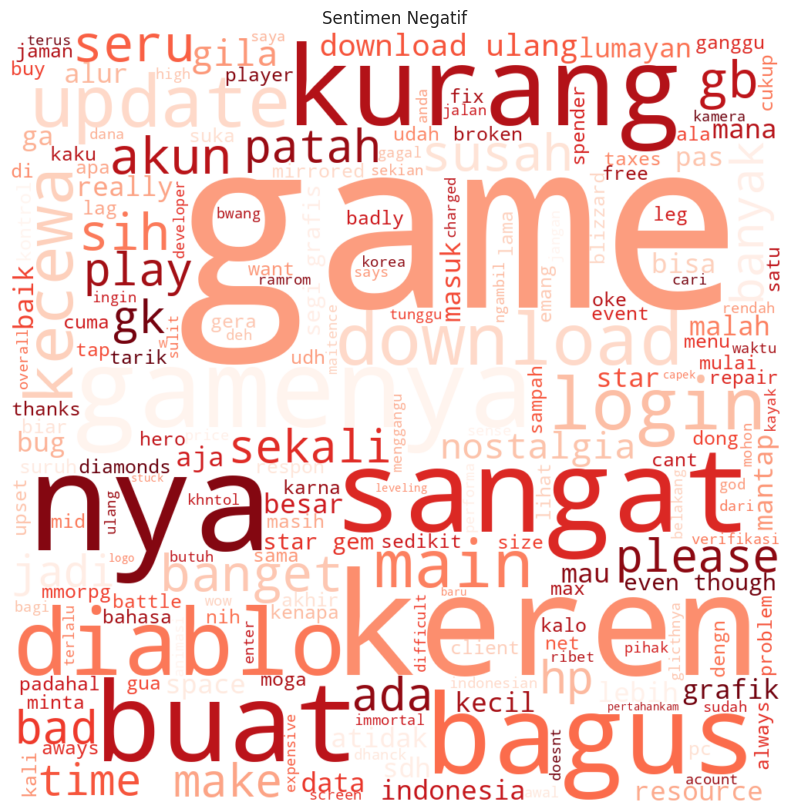

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

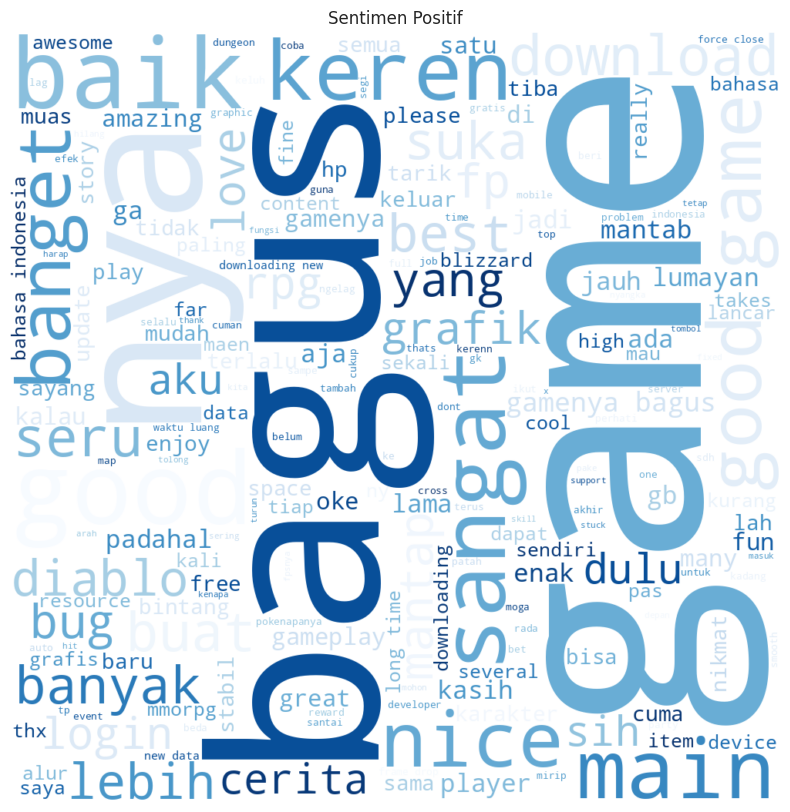

In [44]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
1    315
0    101
Name: count, dtype: int64

# **Data Preparation**

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [49]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

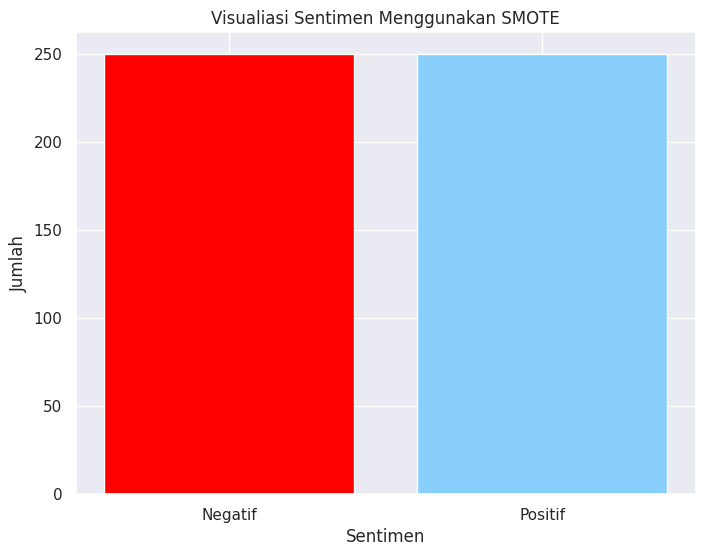

In [50]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue', 'orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [51]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [52]:
y_pred = naive_bayes.predict(X_test_vec)

In [53]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7261904761904762

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.43      0.63      0.51        19
     Positif       0.88      0.75      0.81        65

    accuracy                           0.73        84
   macro avg       0.65      0.69      0.66        84
weighted avg       0.77      0.73      0.74        84



In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[12  7]
 [16 49]]

Accuracy =  0.7261904761904762


In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[12  7]
 [16 49]]

True Positives (TP) =  12

True Negatives (TN) =  49

False Positives (FP) =  7

False Negatives (FN) =  16

Accuracy =  0.7261904761904762


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

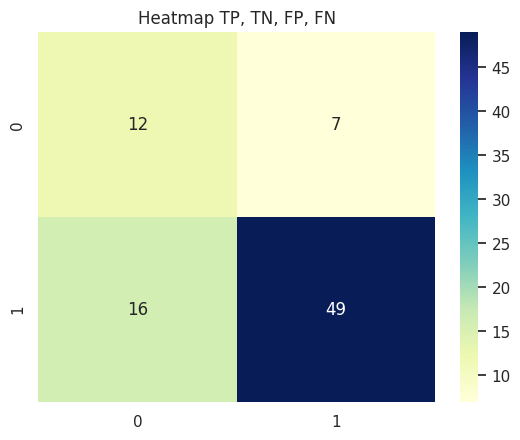

In [56]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1'],
                         index=['0', '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [57]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [58]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7262


In [59]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2738


# **Testing**


In [64]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus bgt sekalian nostalgia
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 76.01%
Probabilitas: 76.01249733043394 %


In [63]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : kecewa banyak bgt bug
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 61.29%
Probabilitas: 61.294963304415674 %
